# <center>590DV - Data Visualization<br><br>Final Project: Part3<br><br>Viz for Others</center>
## Group Members
- Nihit Hindlekar
- Samuel John
- Shamini Hilda Samuvel Mani
- Srijith Srinath

## General Information
**Dataset Name   :** Greenhouse Report - State of Washington<br>
**Dataset Format :** CSV<br>
**Dataset Source :** https://catalog.data.gov/dataset/2015-greenhouse-gas-report-data<br>
**Dataset URL    :** https://catalog.data.gov/dataset/2015-greenhouse-gas-report-data/resource/20b553e7-7c97-4a07-bbce-025c2801f7a2<br>
**Dataset Acess Info:** The dataset is classified as Public and Non-Federal, meaning that it is intended for public access and use which means that the public can use this dataset in any means they would like and that it does not contain information directly related to the central government of the United States. Apart from this, no license data has been provided for this dataset.<br>
**Dataset size   :** 27KB- 142 -rows columns-18

## Introduction

For our Final Assignment, we have chosen the Dataset, <b>Greenhouse Report - State of Washington</b> which we obtained from data.gov

<b>Carbon dioxide equivalent (CO2e)</b> is a measure used to compare the emissions from various greenhouse gases based upon their global warming potentials. 

The report we selected contains greenhouse gas data that was reported to the Department of Ecology for organizations in Washington that emit at least 10,000 metric tons of carbon dioxide equivalent.

Below, we are going to see how the information from the dataset can be used to create meaningful data visualizations that convey important facts and figures from the dataset to the viewers, who in this case do not have good insight into the data themselves.

## Visualization Process
### 1. Load the dataset and describe the contents

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ipywidgets as pw
import traitlets
import bqplot
import folium
from folium.plugins.beautify_icon import BeautifyIcon

sns.set(style = "darkgrid", color_codes=True)

In [3]:
df = pd.read_csv("2015_Greenhouse_Gas_Report-_Data.csv")
tempdf =  pd.read_csv("2015_Greenhouse_Gas_Report-_Data.csv")

In [4]:
xyz = df["Location (Latitude, Longitude) "]
xyz = xyz.map(lambda x: x.lstrip('(').rstrip(')'))
temp = xyz.str.split(expand=True)
temp[0] = temp[0].map(lambda x: x.rstrip(','))

In [5]:
df["Latitude"] = temp[0]
df["Longitude"] = temp[1]
df["Latitude"] = pd.to_numeric(df["Latitude"])
df["Longitude"] = pd.to_numeric(df["Longitude"])

In [6]:
del df["Location (Latitude, Longitude) "]

In [7]:
df

,Source,County,Address,Total Emissions (MT CO2e),Biogenic CO2 (MT CO2),Fossil CO2 (MT CO2),Methane (MT CO2e),Nitrous Oxide (MT CO2e),Hydrofluorocarbons (MT CO2e),Perfluorocarbons (MT CO2e),Sulfur Hexafluoride (MT CO2e),Other (MT CO2e),Sector,Sub Sector,Clean Air Rule,"Energy-Intensive, Trade-Exposed",Point Size- Based on Total Emissions,Latitude,Longitude
0,Agrium Kennewick Fertilizer Operations (KFO) -...,Benton,"227515 E. Bowles Rd Kennewick, WA 99337",155888,0,10731,1,145157,0,0,0,0,Chemicals,Nitric Acid Production,YES,YES,3,46.165957,-119.017218
1,Air Liquide Hydrogen Plant - Anacortes,Skagit,"8581 South Texas Road Anacortes, WA 98221",64413,0,64413,0,0,0,0,0,0,Chemicals,Hydrogen Production,NO,NO,2,48.465617,-122.556032
2,Alcoa Intalco Works - Ferndale,Whatcom,"4050 Mountain View Road Ferndale, WA 98248",1195786,0,418042,10480,34,0,767230,0,0,Metals,Aluminum Production,YES,YES,4,48.845500,-122.705500
3,Alcoa Wenatchee Works - Malaga,Chelan,"6200 Malaga/Alcoa Hwy. Malaga, WA 98828",331207,0,254025,14,16,0,77152,0,0,Metals,Aluminum Production,YES,YES,3,47.356700,-120.127300
4,Ardagh Glass Inc. - Seattle,King,"5801 East Marginal Way South Seattle, WA 98134",76674,0,76614,27,32,0,0,0,0,Minerals,Glass Production,YES,NO,2,47.552420,-122.337390
5,Ash Grove Cement Company - Seattle,King,"3801 E. Marginal Way South Seattle, WA 98134",495030,0,494557,369,104,0,0,0,0,Minerals,Cement Production,YES,YES,3,47.567990,-122.342550
6,"Biofuels Washington, LLC Landfill Gas to Energ...",Pierce,"30919 Meridian Ave, East Graham, WA 98338",19534,19435,0,30,70,0,0,0,0,Power Plants,"Other Power, Heating, or Cooling Plants",NO,NO,1,46.975533,-122.290871
7,Boeing Commercial Airplanes - Everett,Snohomish,"3003 West Casino Rd Everett, WA 98204",66276,0,66207,31,37,0,0,0,0,Manufacturing,Transportation,YES,YES,2,47.918622,-122.276987
8,Boeing Commercial Airplanes - Fabrication (Fre...,Pierce,"18001 Canyon Rd E Puyallup, WA 98375",20833,0,20812,10,12,0,0,0,0,Manufacturing,Transportation,NO,YES,1,47.088831,-122.348620
9,"Boise Cascade Wood Products, LLC. Kettle Fall...",Stevens,"610 West 3rd Avenue Kettle Falls, WA 99141",57294,56539,0,109,647,0,0,0,0,Wood Products,Lumber Mills,NO,NO,2,48.609799,-118.067441


**Dataset Description**

From the table above, we see that the dataset describes the Greenhouse Gas (GHG) emissions of 141 organizations from the state of Washington. It provides the county, sector, sub-sector, longitude, latitude and emission details of each of these companies.
As seen above, the dataframe contains 18 columns. The breakdown of the columns is as follows:

- <b>Source</b> - Contains the names of the organizations in the dataframe
- <b>County</b> - Contains the name of the county the organization is located in
- <b>Address</b> - Address details of the organization
- <b>Total Emissions (MT CO2e)</b> - Total emission in terms of metric tons of carbon dioxide equivalent
- <b>Biogenic CO2 (MT CO2)</b> - Biogenic emission of Carbon Dioxide in terms of metric tons of carbon dioxide equivalent
- <b>Fossil CO2 (MT CO2)</b> - Fossil emission of Carbon Dioxide in terms of metric tons of carbon dioxide equivalent
- <b>Methane (MT CO2e)</b> - Methane emission in terms of metric tons of carbon dioxide equivalent
- <b>Nitrous Oxide (MT CO2e)</b> - Nitrous Oxide emission in terms of metric tons of carbon dioxide equivalent
- <b>Hydrofluorocarbons (MT CO2e)</b> - Hydrofluorocarbons emission in terms of metric tons of carbon dioxide equivalent
- <b>Perfluorocarbons (MT CO2e)</b> - Perfluorocarbons emission in terms of metric tons of carbon dioxide equivalent
- <b>Sulfur Hexafluoride (MT CO2e)</b> - Sulfur Hexafluoride emission in terms of metric tons of carbon dioxide equivalent
- <b>Other (MT CO2e)</b> - Other emissions in terms of metric tons of carbon dioxide equivalent
- <b>Location (Latitude, Longitude)</b> -  Location details of the organization
- <b>Sector</b> - The sector of business the organization belongs to
- <b>Sub Sector</b> - Further classification of the sector of business the organization belongs to
- <b>Clean Air Rule</b> - YES/NO values based on if the organization follows the Clean Air Rule
- <b>Energy-Intensive, Trade-Exposed</b> -  YES/NO values showing if the organization has energy-intensive processes that are highly exposed to global competition
- <b>Point Size- Based on Total Emissions</b> - A point-based rating of the emissions produced by an organization

## Visualization 1 - Organization Locations
For our first visualization, we will use the dataset above to see where the different organizations are located. For this visualization, we will be using Folium which is a powerful Python library which can be used to bind data to a map in order to create visualization of the data as markers on the map.

In [8]:
business = {}

m = folium.Map(location = [47.7511, -120.7401], tiles="cartodbpositron", zoom_start=7)
for i in range(0,len(df)):
    business[i] = BeautifyIcon(icon='building', border_color='#bababa', text_color='#4d4d4d', icon_shape='circle')
    folium.Marker([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']], popup = df.iloc[i]['Source'],
                 icon = business[i]).add_to(m)
m

<center>**Location of Each Organization on the Map**</center>

**Explanation and Inferences**

Since the dataset contains details of organizations located in the state of Washington, we have used the coordinates of Washington to zoom into the world map and highlight only this region. Each organization is then represented as a marker in the state of Washington and clicking on each marker brings up the name of the corresponding organization.

From the visualization above, we see that a large number of the organizations listed in the dataset lie in close proximity to waterbodies such as rivers or lakes. This could be due to the fact that most of these organization deal with wood products, chemicals, power production or food production and as such could these rely on waterbodies for transportation, power generation or for water supply and waste disposal.

## Visualization 2 -  Total Emission Statistics by County
As mentioned earlier, the emissions of large organization are expressed in terms of Carbon dioxide equivalent (CO2e). 

For our second visualization, we will be grouping the organization by county in order to take a look at the total emissions of each County. For this purpose, we will be using the matplotlib library which is a 2-D plotting library for Python. 

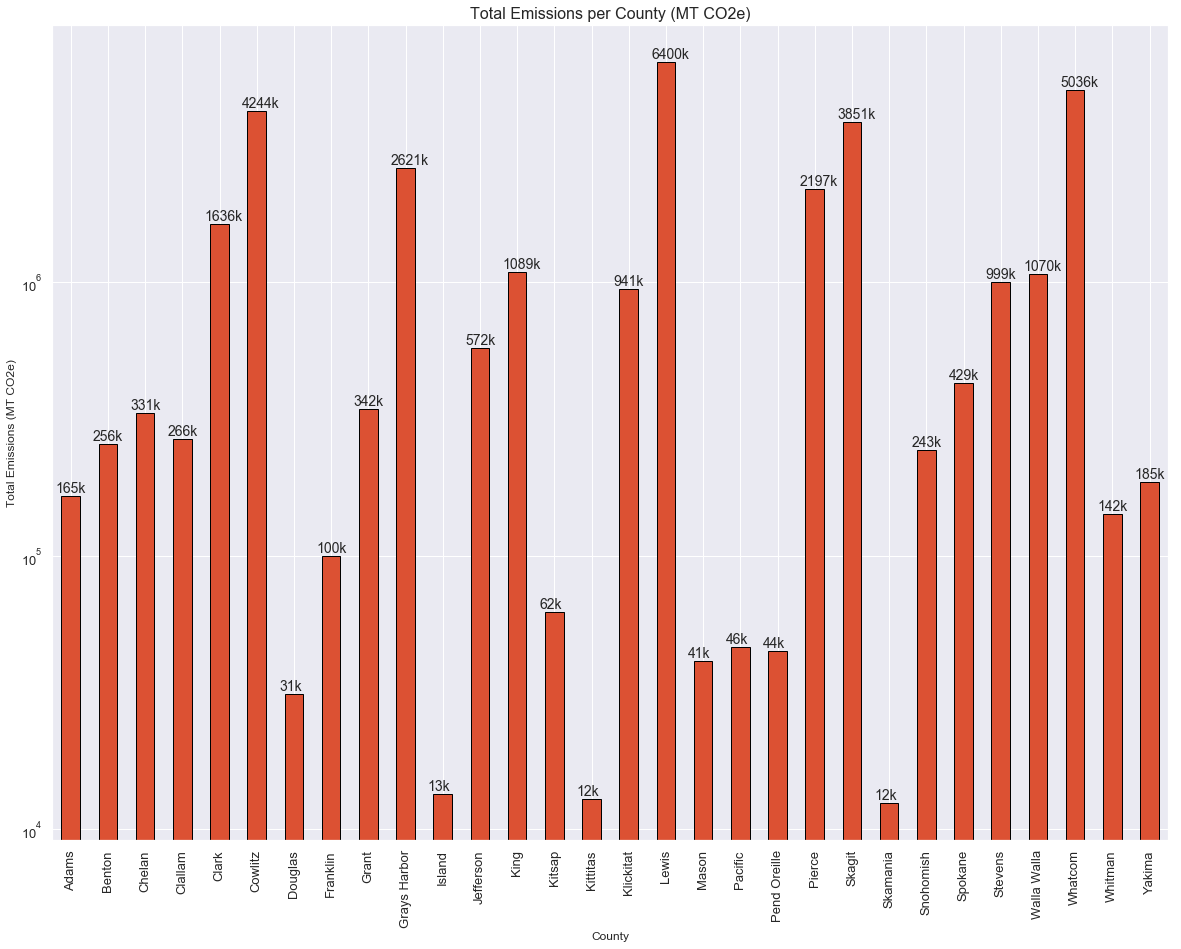

In [9]:
county_total_emission = df.groupby("County")["Total Emissions (MT CO2e)"].sum()
temp = pd.DataFrame(county_total_emission)

ax1 = temp['Total Emissions (MT CO2e)'].plot(kind='bar', color = '#DC5133', edgecolor='black', figsize=(20,15), fontsize=13)

ax1.set_xlabel("County")
ax1.set_ylabel("Total Emissions (MT CO2e)")
ax1.set_title("Total Emissions per County (MT CO2e)", fontsize=16)
ax1.set_yscale("log")

tempvals = ["165k","256k","331k", "266k", "1636k", "4244k", "31k", "100k", "342k", "2621k", "13k", "572k", "1089k",
           "62k", "12k", "941k", "6400k", "41k", "46k", "44k", "2197k", "3851k", "12k", "243k", "429k", "999k",
           "1070k", "5036k", "142k", "185k"]
y = 0
for i in ax1.patches:
    height = i.get_height()
    label_position = height + (height * 0.03)
    ax1.text(i.get_x()-.15, label_position, tempvals[y], fontsize = 14)
    y = y+1

**Explanation and Inferences**

The above visualization shows a bar plot between Total Emissions vs County data, where the total emissions of each of the companies are grouped according to the county they belong to. The total emissions is calculated by aggregating the total emissions of all the companies in that particular county. Also, the values have been transformed using a log scale for better visualization.

From the graph obtained above, we see that counties such as Cowiltz, Lewis, Skagit and Whatcom have a relatively higher amount of total emissions compared to the other counties while counties such as Douglas, Island, Kittitas and Skamania have a relatively lower amount of total emission as compared to the other counties. 

## Visualization 3 - Total Emission Statistics by Sector
The visualization above provides details on the total emissions per county. However, knowing just the county data is not quite relavent unless we know the details of each sector. For this reason, our next visualization represents the total emission data per sector in terms of Carbon dioxide equivalent (CO2e), using matplotlib.

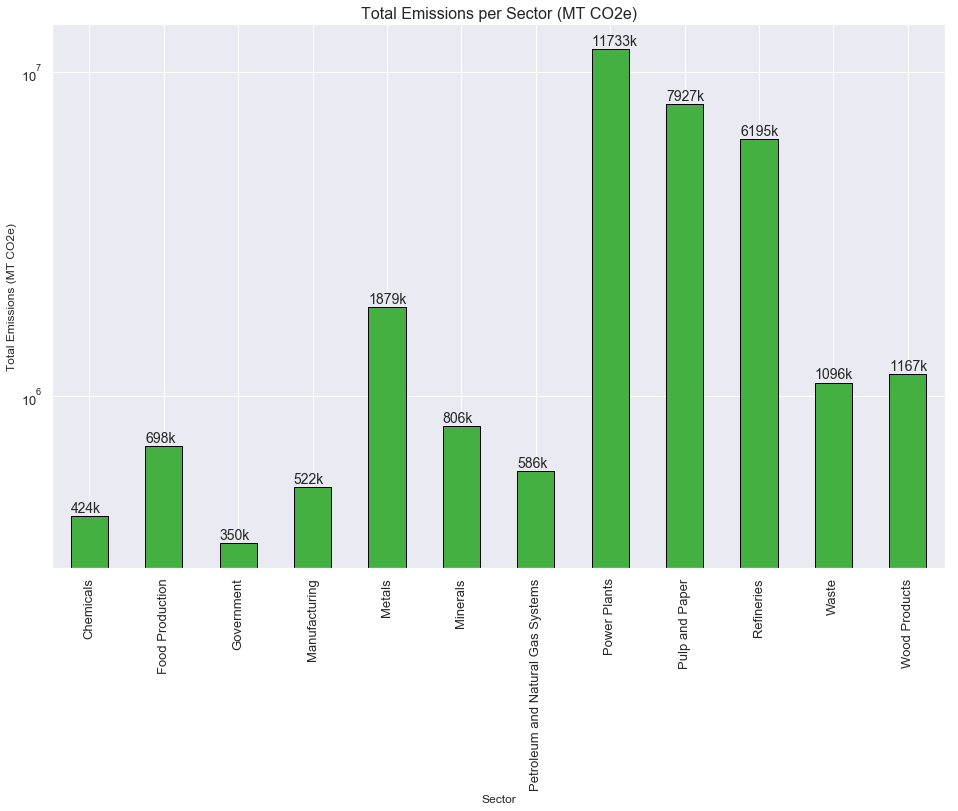

In [10]:
sector_total_emission = df.groupby("Sector ")["Total Emissions (MT CO2e)"].sum()
temp1 = pd.DataFrame(sector_total_emission)

ax2 = temp1['Total Emissions (MT CO2e)'].plot(kind='bar', color = '#45B042', edgecolor='black', figsize=(16,10), fontsize=13)

ax2.set_xlabel("Sector")
ax2.set_ylabel("Total Emissions (MT CO2e)")
ax2.set_title("Total Emissions per Sector (MT CO2e)", fontsize=16)
ax2.set_yscale("log")

temp1vals = ["424k", "698k", "350k", "522k", "1879k", "806k", "586k", "11733k", "7927k", "6195k", "1096k", "1167k"]
             
y = 0
for i in ax2.patches:
    height = i.get_height()
    label_position = height + (height * 0.03)
    ax2.text(i.get_x(), label_position, temp1vals[y], fontsize = 14)
    y = y+1

**Explanations and Inferences**

The visualization above shows a bar plot between Total Emissions vs Sector data, where the total emissions of each of the companies are grouped according to the sector they belong to. The total emissions is calculated by aggregating the total emissions of all the companies in that particular Sector. Also, the values have been transformed using a log scale for better visualization.

From the graph, we can infer that organizations that lie in the power production sector, pulp and paper sector and refineries sector emit a larger number of total emissions than organizations in other sectors. This makes sense since Electricity production generates the second largest share of greenhouse gas emissions while industries come in third due to the burning of fossil fuels for energy. (https://www.epa.gov/ghgemissions/sources-greenhouse-gas-emissions). Government organizations on the other hand do not emit large amounts of greenhouse gases and this is seen on the graph. 

## Visualization 4 - Total Emission Statistics by Sub-Sector
Now that we have seen the details of total emissions per county and sector, lets dive in deeper to get an overview of the total emissions per sub sector. In the graph above, we saw that the power generation sector and industries had a higher amount of total emissions. We would expect the branches of these sectors to have higher levels of total emissions compared to the other sub-sectors. Again, we would be using matplotlib for this visualization.

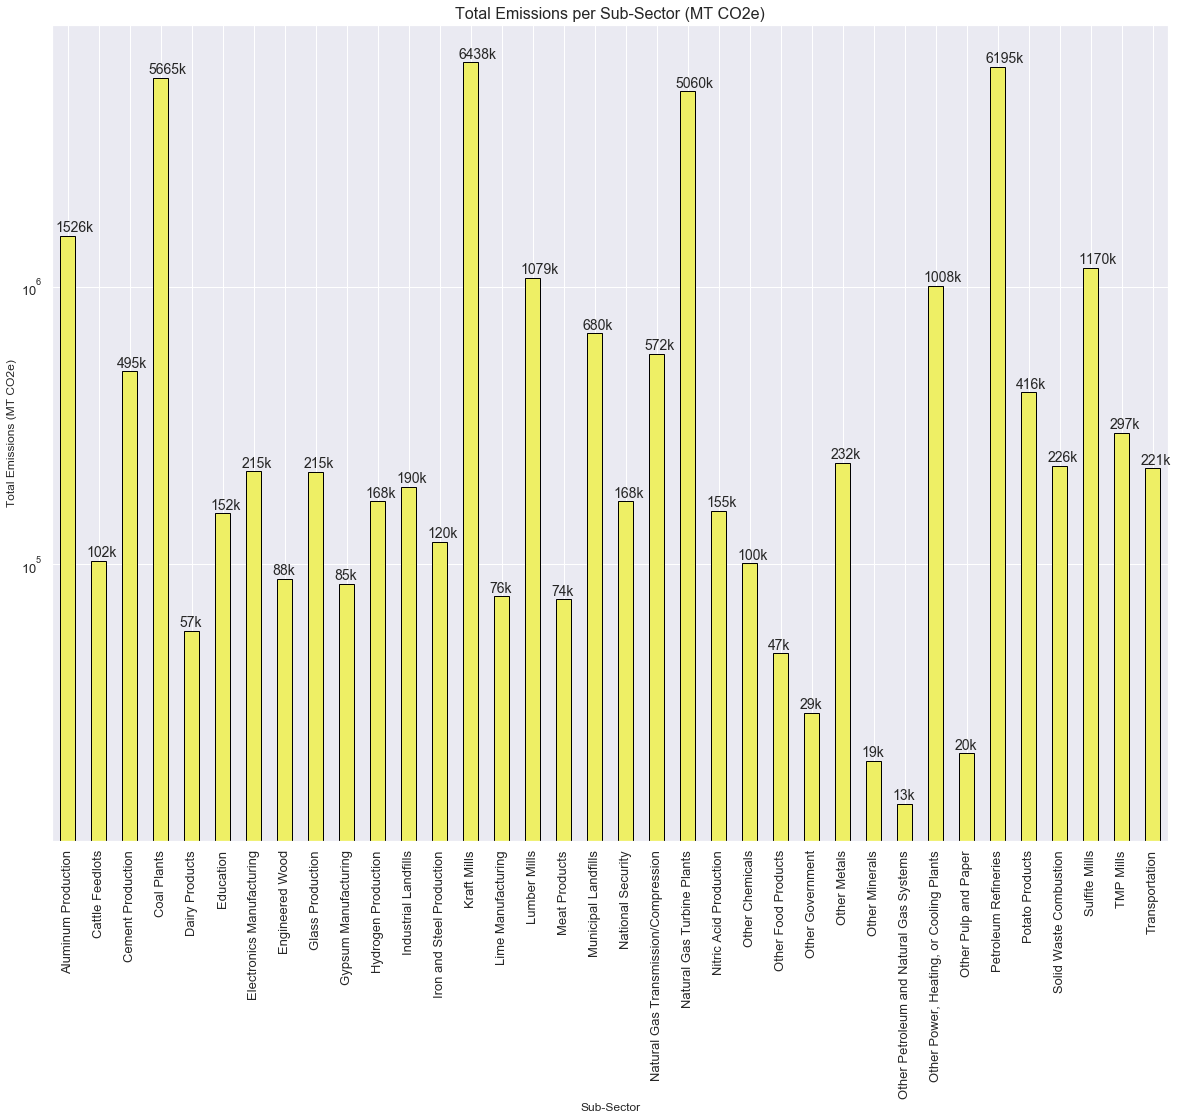

In [11]:
subsector_total_emission = df.groupby("Sub Sector")["Total Emissions (MT CO2e)"].sum()
temp2 = pd.DataFrame(subsector_total_emission)


ax3 = temp2['Total Emissions (MT CO2e)'].plot(kind='bar', color = '#EEEF65', edgecolor='black', 
                                              figsize=(20,15), fontsize=13)

ax3.set_xlabel("Sub-Sector")
ax3.set_ylabel("Total Emissions (MT CO2e)")
ax3.set_title("Total Emissions per Sub-Sector (MT CO2e)", fontsize=16)
ax3.set_yscale("log")

temp2vals = ["1526k", "102k", "495k", "5665k", "57k", "152k", "215k", "88k", "215k", "85k", "168k", "190k",
            "120k", "6438k", "76k", "1079k", "74k", "680k", "168k", "572k", "5060k", "155k", "100k", "47k",
            "29k", "232k", "19k", "13k", "1008k", "20k", "6195k", "416k", "226k", "1170k", "297k", "221k"]
             
y = 0
for i in ax3.patches:
    height = i.get_height()
    label_position = height + (height * 0.03)
    ax3.text(i.get_x() - 0.15, label_position, temp2vals[y], fontsize = 14)
    y = y+1

**Explanations and Inferences**

The above visualization shows a bar plot between Total Emissions vs Sub-Sector data, where the total emissions of each of the companies are grouped according to the Sub-Sector they belong to. The total emissions is calculated by aggregating the total emissions of all the companies in that particular Sub-Sector. Also, the values have been transformed using a log scale for better visualization.

As expected, sub-sectors such as Coal Plants, Kraft Mills, Natural Gas Turbine Plants and Petroleum Refineries emit considerably higher levels of emissions than the other sub-sectors which strengthens the argument that these sectors are the primary sources of greenhouse emissions. 

## Visualization 5 - Top 10 Organizations by Total Emissions
Before we go any further, let's take a look at the top 10 Organizations based on total emissions. 

Matplotlib allows for the creation of a horizontal bar graph which is a good depiction of the readings of each of the top 10 organizations by total emissions.

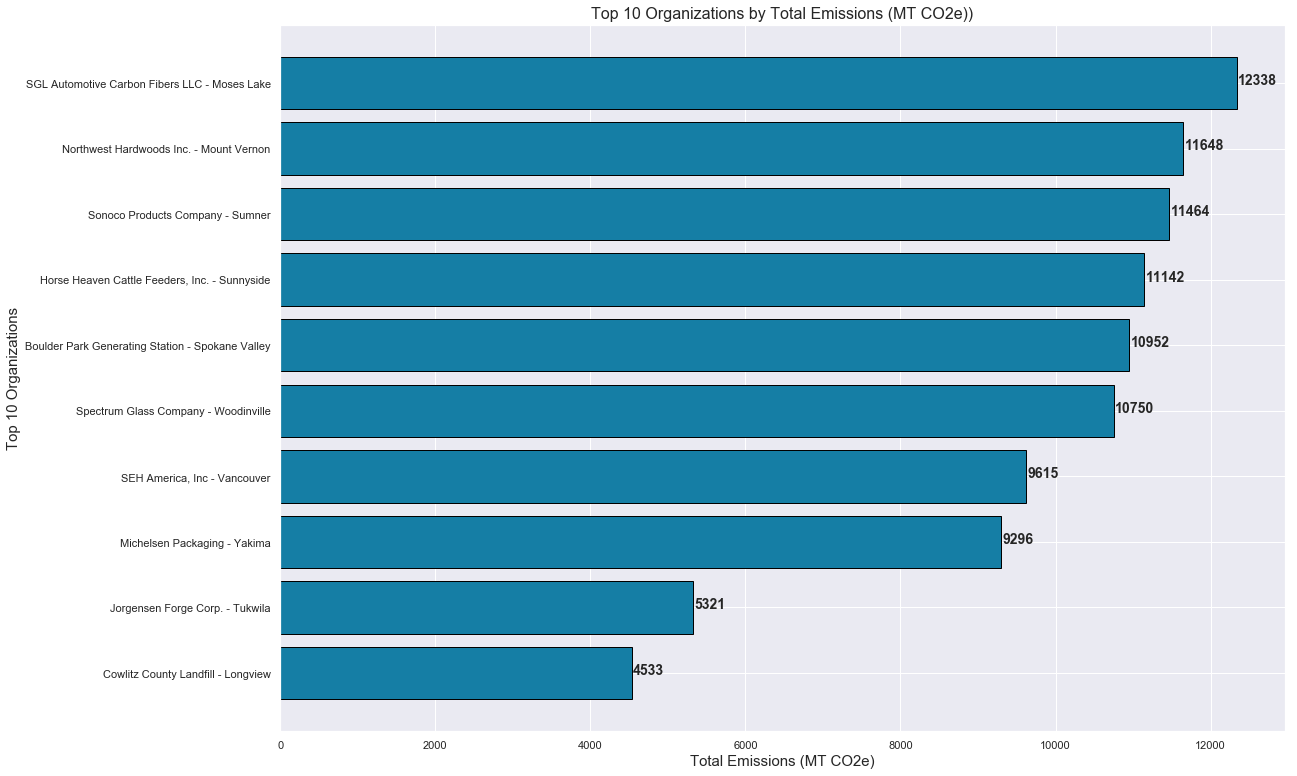

In [12]:
company = pd.DataFrame(df.groupby("Source")["Total Emissions (MT CO2e)"].sum())
company_emission = company.sort_values(by='Total Emissions (MT CO2e)')
top_ten_companies = company_emission.iloc[0:10]
vals4 = top_ten_companies["Total Emissions (MT CO2e)"].values

plt.rcParams["figure.figsize"] = 18,13
plt.barh(top_ten_companies.index.values,top_ten_companies["Total Emissions (MT CO2e)"],color = '#157EA5', edgecolor='black')
plt.xlabel("Total Emissions (MT CO2e)", fontsize = 15)
plt.ylabel("Top 10 Organizations", fontsize = 15)
plt.title("Top 10 Organizations by Total Emissions (MT CO2e))", fontsize=16)

for i, v in enumerate(vals4):
    plt.text(v + 20, i - .02, str(v), fontsize = 14, fontweight='bold')

**Explanations and Inferences**

The above horizontal bar chart shows the total emissions of top 10 Organizations which was obtained by grouping the sources by total emissions, sorting them in descending order and then selecting the top 10 sources from the list. 

We see that **SGL Automotive Carbon Fibres LLC** holds the top rank in terms of amount of emissions. We also see that most of these organizations are industries or power stations which further strengthens the claim that these sectors are major sources of greenhouse emissions due to emissions from certain chemical reactions necessary to produce goods from raw materials. 

## Visualization 6 - Point Size Based on Total Emissions

Now that we have a good idea about the total emission amounts per county, sector and sub-sector as well as the top 10 industries by total emissions, let us look at the point sizes.

We know that each organization has a different emission amount listed against it in the dataset. The dataset groups these emissions based on their values and each organization is given a point size based on which group their total emissions fall under. The point scale ranges from 1 to 5 with 1 being awarded to the lowest emissions and 5 being awarded to the highest emissions. Hence, the higher the score, the more the emissions being emitted by that organization.

In order to visualize this, we will be using a two-step method.

### Step 1 - Create Intensity Groups based on Point Sizes
We will use the point sizes in the dataset to create 5 intensity groups which can then be used to classify each organization.

The intensity group corresponds to the point size awarded to the organization and contains the number of organizations that have been awarded that particular point size.

Text(0.5, 1.0, 'Number of Organizations per Intensity Group')

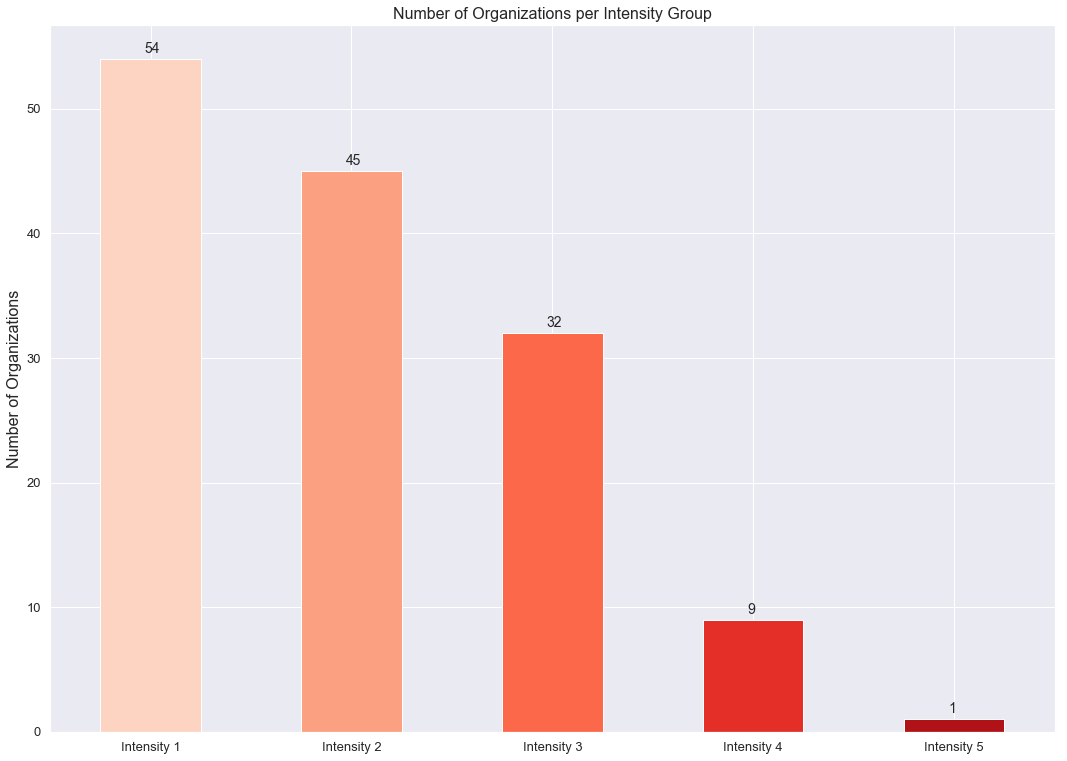

In [13]:
objects = ("Intensity 1","Intensity 2","Intensity 3","Intensity 4","Intensity 5")
pos = np.arange(len(objects))
freq = df['Point Size- Based on Total Emissions'].value_counts()
ax = df['Point Size- Based on Total Emissions'].value_counts().plot(kind='bar',
                                                  color = sns.color_palette("Reds", len(objects)), fontsize=13)
for i in ax.patches:
    plt.text(i.get_x()+.22, i.get_height()+.5, i.get_height(), fontsize = 14)

plt.rcParams["figure.figsize"] = 18,13
plt.xticks(pos, objects, rotation = 360)
plt.ylabel('Number of Organizations', fontsize = 16)
plt.title("Number of Organizations per Intensity Group", fontsize=16)

As seen above, there are 5 intensity groups corresponding to the 5 point sizes. We see that the intensity group 5 contains only 1 organization while the intensity group 1 contains 54 organizations. We will now use the information from these groups to identify each organization as being part of an intensity group and marking the organization on a map along as a representation of the intensity group it falls under.

### Part 2 - Map Each Organization Based on Intensity Group
For this part of the visualization, we will be using Folium.

In [14]:
dicts = {}

maps = folium.Map(location = [47.7511, -120.7401], tiles="Stamen Terrain", zoom_start=7)
for i in range(0,len(df)):
    if(df.iloc[i]['Point Size- Based on Total Emissions'] == 1):
        dicts[i] = BeautifyIcon(border_color='#fee5d9', text_color='#fee5d9', number=1,inner_icon_style='margin-top:0;')
        folium.Marker([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']], 
                      popup = df.iloc[i]['Source'], icon = dicts[i]).add_to(maps)
    if(df.iloc[i]['Point Size- Based on Total Emissions'] == 2):
        dicts[i] = BeautifyIcon(border_color='#fcae91', text_color='#fcae91', number=2,inner_icon_style='margin-top:0;')
        folium.Marker([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']], 
                      popup = df.iloc[i]['Source'], icon = dicts[i]).add_to(maps)
    if(df.iloc[i]['Point Size- Based on Total Emissions'] == 3):
        dicts[i] = BeautifyIcon(border_color='#fb6a4a', text_color='#fb6a4a', number=3,inner_icon_style='margin-top:0;')
        folium.Marker([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']], 
                      popup = df.iloc[i]['Source'], icon = dicts[i]).add_to(maps)
    if(df.iloc[i]['Point Size- Based on Total Emissions'] == 4):
        dicts[i] = BeautifyIcon(border_color='#de2d26', text_color='#de2d26', number=4,inner_icon_style='margin-top:0;')
        folium.Marker([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']], 
                      popup = df.iloc[i]['Source'], icon = dicts[i]).add_to(maps)
    if(df.iloc[i]['Point Size- Based on Total Emissions'] == 5):
        dicts[i] = BeautifyIcon(border_color='#a50f15', text_color='#a50f15', number=5,inner_icon_style='margin-top:0;')
        folium.Marker([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']], 
                      popup = df.iloc[i]['Source'], icon = dicts[i]).add_to(maps)

In [15]:
maps

<center>**Number of Organizations based on Intensity**</center>

**Explanations and Inferences**

As seen above, each circle on the map represent the sources' location and its intensity level, which is differentiated in shades of red similar to the above histogram. The circle also contains the number of the intensity group the source (Organization) falls under and clicking on a circle provides the name of the Organization. 

We can see that a large number of organizations fall under intensity groups 1 and 2, fewer number of organizations fall under group 3 and very few organizations fall under intensity groups 4 and 5.

## Visualization 7 - Emission Breakdown per County
The above 6 visualizations provided us a good idea about the emissions per county and sector. However, we are yet to look at what gases are part of these total emissions.

For this visualization, we will be listing out the amounts of Biogenic CO2, Fossil CO2, Methane and Nitrous Oxide that are emitted per county, with the help of bqplot. 

In [16]:
choose_county = pw.Dropdown(description = "Choose County",
                          options = ['Adams', 'Benton', 'Chelan', 'Clallam', 'Clark', 'Cowlitz',
                                    'Douglas', 'Franklin', 'Grant', 'Grays Harbor', 'Island',
                                    'Jefferson', 'King', 'Kitsap', 'Kittitas', 'Klickitat', 'Lewis',
                                    'Mason', 'Pacific', 'Pend Oreille', 'Pierce', 'Skagit', 'Skamania',
                                    'Snohomish', 'Spokane', 'Stevens', 'Walla Walla', 'Whatcom',
                                    'Whitman', 'Yakima'],
                          value = "Grant",style={'description_width': 'initial'}
                         )

biogenic = df.groupby("County")["Biogenic CO2 (MT CO2)"].sum()
fossil = df.groupby("County")["Fossil CO2 (MT CO2)"].sum()
methane = df.groupby("County")["Methane (MT CO2e)"].sum()
nitrous = df.groupby("County")["Nitrous Oxide (MT CO2e)"].sum()

def change_county(change):
    x = biogenic[choose_county.value]
    y = fossil[choose_county.value]
    z = methane[choose_county.value]
    u = nitrous[choose_county.value]
    marks = (x,y,z,u)
    scatters.x = labels
    scatters.y = marks

labels = ("Biogenic CO2 (MT CO2)","Fossil CO2 (MT CO2)","Methane (MT CO2e)","Nitrous Oxide (MT CO2e)")
x = biogenic["Grant"]
y = fossil["Grant"]
z = methane["Grant"]
u = nitrous["Grant"]
marks = [x,y,z,u]

choose_county.observe(change_county)

x_sc = bqplot.OrdinalScale()
y_sc = bqplot.LinearScale()

x_ax = bqplot.Axis(scale = x_sc, label = "Different Gases")
y_ax = bqplot.Axis(scale = y_sc , label = "Amount", orientation = 'vertical')

tooltip = bqplot.Tooltip(fields = ["x","y"])

scatters = bqplot.Scatter(x = labels,
                         y = marks,
                         scales = {'x': x_sc, 'y': y_sc},
                         tooltip = tooltip,
                         colors=['#3182BD'], stroke='black')
fig = bqplot.Figure(marks = [scatters],axes =[x_ax, y_ax], title = "Emission Breakdown per County")

In [17]:
display(choose_county)
display(fig)

Dropdown(description='Choose County', index=8, options=('Adams', 'Benton', 'Chelan', 'Clallam', 'Clark', 'Cowl…

Figure(axes=[Axis(label='Different Gases', scale=OrdinalScale()), Axis(label='Amount', orientation='vertical',…

**Different Gases vs Amount at County Level**

In the visualization above, we see a scatter plot which shows the amount of gases (Biogenic CO2, Fossil CO2, Methane, Nitrous Oxide) emitted per County. The user can select a county from the dropdown list and the graph updates to show the amount of each emissions specific to that county.

## Visualization 8 - Clean Air Rule

The Clean Air Rule in Washington required industries to cap and gradually reduce their carbon emissions by an average 1.7 percent a year — or pay for equivalent reductions elsewhere. 

This rule is currently on hold due to certain rulings, but was prevailant at the time this dataset was created, hence, the dataset lists out if each of the organizations follow the Clean Air Rule or not. A YES means that the organization followed the rule and no means otherwise. 

This Visualization aims to list out, per sector, the number of organizations that abided by the rule vs the number of organizations that disregarded the rule. 

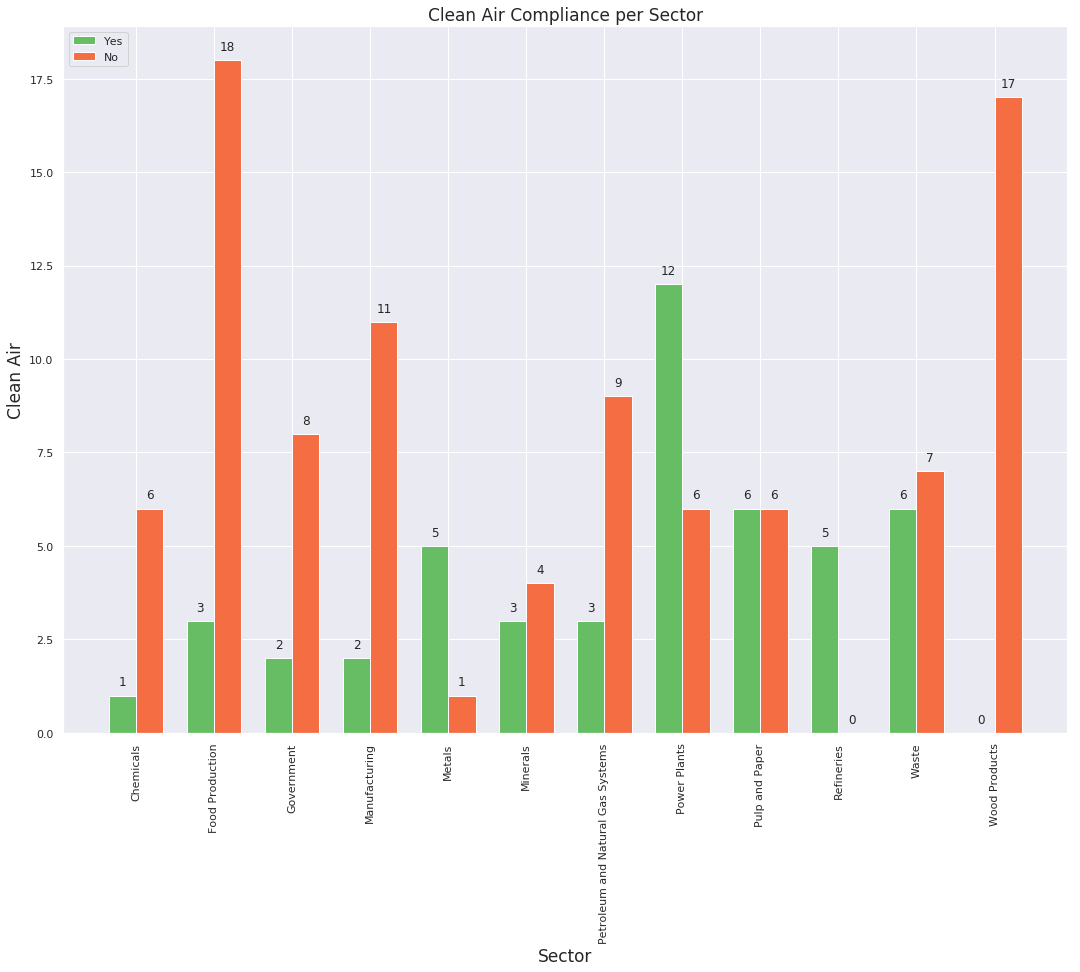

In [18]:
yes = df.loc[df["Clean Air Rule "] == 'YES', ["Sector ", "Clean Air Rule "]]
yes1= pd.DataFrame(yes.groupby("Sector ")["Clean Air Rule "].count())

no = df.loc[df["Clean Air Rule "] == 'NO', ["Sector ", "Clean Air Rule "]]
no1= pd.DataFrame(no.groupby("Sector ")["Clean Air Rule "].count())

sector = np.unique(df["Sector "])
sector = np.sort(sector)

clean_air_rule = pd.merge(yes1, no1, left_on=yes1.index.values, right_on=no1.index.values,how = "outer")
clean_air_rule.fillna(0, inplace=True)
count_yes = clean_air_rule.values

def autolabel(rects, xpos='center'):
    (y_bottom, y_top) = ax4.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)
        ax4.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')

width = 0.35
ind = np.arange(len(count_yes))

plt.rcParams["figure.figsize"] = 18,13
fig, ax4 = plt.subplots()
rects1 = ax4.bar(ind - width/2, clean_air_rule["Clean Air Rule _x"], width, color='#66bd63', label='Yes')
rects2 = ax4.bar(ind + width/2, clean_air_rule["Clean Air Rule _y"], width, color='#f46d43', label='No')
ax4.set_xlabel('Sector', fontsize = 17)
ax4.set_ylabel('Clean Air', fontsize = 17)
ax4.set_title('Clean Air Compliance per Sector', fontsize = 17)
ax4.set_xticks(ind)
ax4.set_xticklabels(clean_air_rule["key_0"])
plt.xticks(rotation = 90)
ax4.legend(loc = 2)


autolabel(rects1, "left")
autolabel(rects2, "right")

**Explanations and Inferences**

The plot above is a bar grpah that shows various sectors and their respective "Clean Air Rule" - state regulation compliance count. 

At first glance, we can tell that the number of organizations that disregarded the rule is higher than the number of those that abided by the rule. 

The large difference between these numbers shows that there were a lot of organizations that did not agree with this rule. We can tie this to the fact that many organizations sued against this rule which lead to the Thurston County Superior Court looking into the rule and ruling against it in March 2018, putting it on hold. (https://ecology.wa.gov/Air-Climate/Climate-change/Carbon-reduction-targets/Clean-Air-Rule)

## Visualization 9 - Energy-Intensive, Trade-Exposed Industries
Finally, let us look at the concept of <i>Energy-Intensive, Trade-Exposed</i>.

An industry is termed as Energy-Intensive, Trade-Exposed if it employs highly energy-intensive processes and is highly exposed to global competition. 

The view of climate change legislators is that, due to the rules applied to these industries, they face high competition from international competitors who do not have to abide by the same rules. It is predicted that if these industries continue to face tough competition, it could lead to increased import from other countries or the relocation of these industries' factories to other countries where the rules are less stringent, leading to increased greenhouse gas emissions - a phenomenon known as <i>Carbon Leakage</i> (https://aceee.org/topics/energy-intensive-trade-exposed-industries).

Let us take a look at the Energy-Intensive, Trade-Exposed Sectors that are listed out in this dataset, with the help of matplotlib.

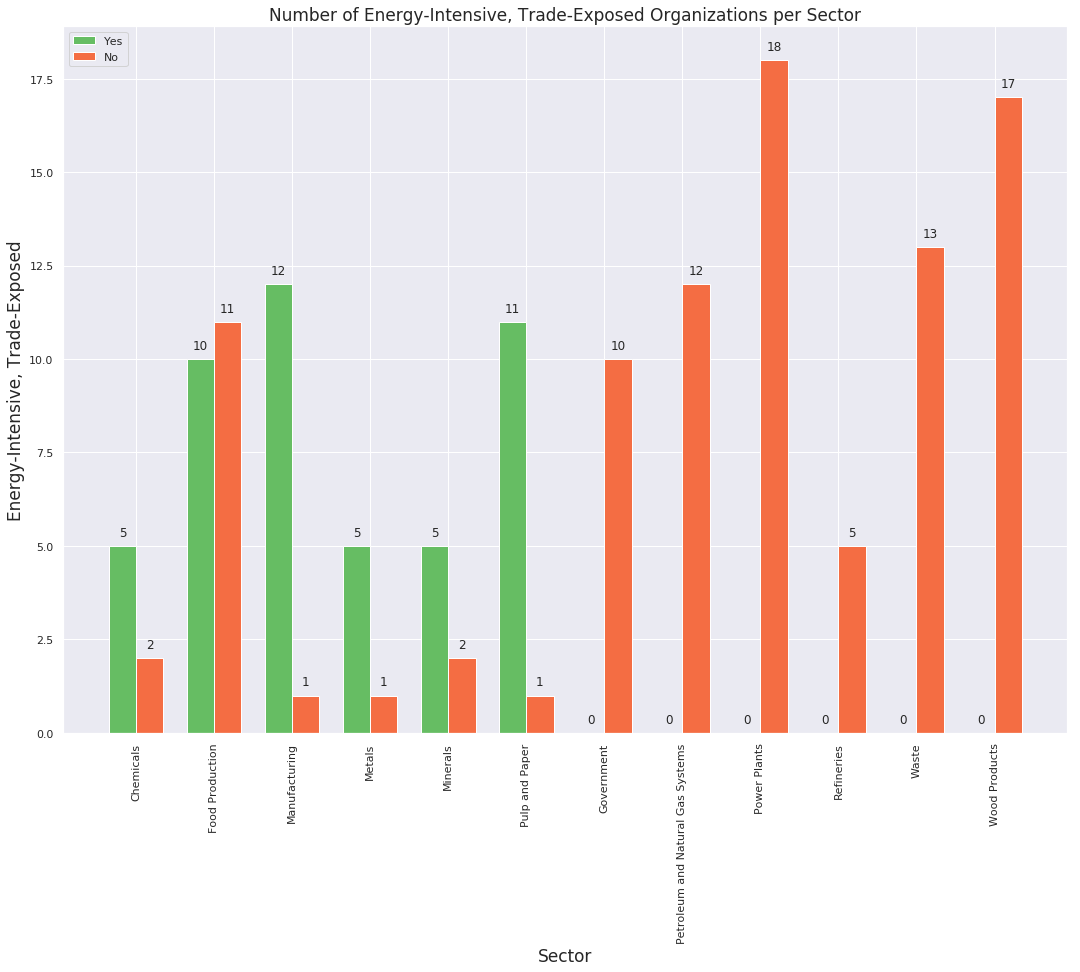

In [19]:
yes = df.loc[df['Energy-Intensive, Trade-Exposed '] == 'YES', ['Sector ', 'Energy-Intensive, Trade-Exposed ']]
yes_energy = pd.DataFrame(yes.groupby('Sector ')['Energy-Intensive, Trade-Exposed '].count())

no = df.loc[df['Energy-Intensive, Trade-Exposed '] == 'NO', ['Sector ', 'Energy-Intensive, Trade-Exposed ']]
no_energy = pd.DataFrame(no.groupby('Sector ')['Energy-Intensive, Trade-Exposed '].count())

Energy_Intensive_rule = pd.merge(yes_energy, no_energy, left_on= yes_energy.index.values, 
                                 right_on= no_energy.index.values,how='outer')
Energy_Intensive_rule.fillna(0, inplace=True)

count_yes_energy = Energy_Intensive_rule.values

def autolabel(rects, xpos='center'):
    (y_bottom, y_top) = ax5.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)
        ax5.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')

width = 0.35
ind = np.arange(len(count_yes_energy))

plt.rcParams["figure.figsize"] = 18,13
fig, ax5 = plt.subplots()
rects1 = ax5.bar(ind - width/2, Energy_Intensive_rule["Energy-Intensive, Trade-Exposed _x"], width, color='#66bd63', label='Yes')
rects2 = ax5.bar(ind + width/2, Energy_Intensive_rule["Energy-Intensive, Trade-Exposed _y"], width, color='#f46d43', label='No')
ax5.set_xlabel('Sector', fontsize = 17)
ax5.set_ylabel('Energy-Intensive, Trade-Exposed', fontsize = 17)
ax5.set_title('Number of Energy-Intensive, Trade-Exposed Organizations per Sector', fontsize = 17)
ax5.set_xticks(ind)
ax5.set_xticklabels(Energy_Intensive_rule["key_0"])
plt.xticks(rotation = 90)
ax5.legend(loc = 2)

autolabel(rects1, "left")
autolabel(rects2, "right")

**Explanations and Inferences**

The plot above shows various sectors and whether they belong to the "Energy-Intensive, Trade-Exposed" category or not. Each bar in the graph represents the number of organizations in that sector that either fall under this category or not. For Example, the Chemicals sector has 5 organizations that fall under the Energy-Intensive, Trade-Exposed category and 2 organizations that do not.

From this graph we can infer that Manufacturing has the highest number of organizations that fall under the Energy-Intensive, Trade-Exposed category while Power Plants have the highest number of organizations that do not fall under this category. Hence, if decisions were to be taken with respect to Energy-Intensive,Trade-Exposed industries, sectors such as Food Production, Manufacturing and Pulp and Paper would be affected the most. 

## Conclusion

Through this assignment, we learned how to create visualizations that cater to users whom we know very little about. These users could have very little knowledge of the data and each visualization has to be highly narrative and interactive in order to communicate the concept clearly to the user, while representing the data in a meaningful manner, with respect to the purpose behind the visualization.

We also learned how to work as a group to identify a good dataset, identify the ways the data could be manipulated in order to create these visualizations and how to link these visualizations to real time issues and analysis. For instance, through this dataset, we learned about rules such as the Clean Air Rule and how industries reacted to this rule. At the same time, the readings we obtained through our visualizations complemented our findings on these industries' reactions to the rule which showed us how powerful these visualizations are.